# Guiding questions

In which fields does the international student population overtake the domestic student population?

How important a role do international students play in our graduate programs?

Are students making compromises in academic choices in order to receive better chances of getting work visa?

In [15]:
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from utils import read_gss
d, ufields = read_gss('../data/GSS_Columbia_Broad.csv', fieldscope='Broad')

In [17]:
DOM_COL_NAME = 'U.S. citizens and permanent residents (non-U.S. citizens holding green cards)'
INT_COL_NAME = 'Foreign nationals'

DOM_LABEL = 'U.S. citizens & permanent residents'
INT_LABEL = INT_COL_NAME

In [18]:
years = np.arange(1994, 2017)

def plotField(ax, field):
    domestic = []
    international = []
    
    for year in years:
        counts = d[year][field]
        domestic.append(counts.get(DOM_COL_NAME, None))
        international.append(counts.get(INT_COL_NAME, None))
    
    ax.plot(years, domestic, label=DOM_LABEL)
    ax.plot(years, international, label=INT_LABEL)
    
    ax.set_title(field)
    ax.set(xlabel='Year', ylabel='Number of graduate students')

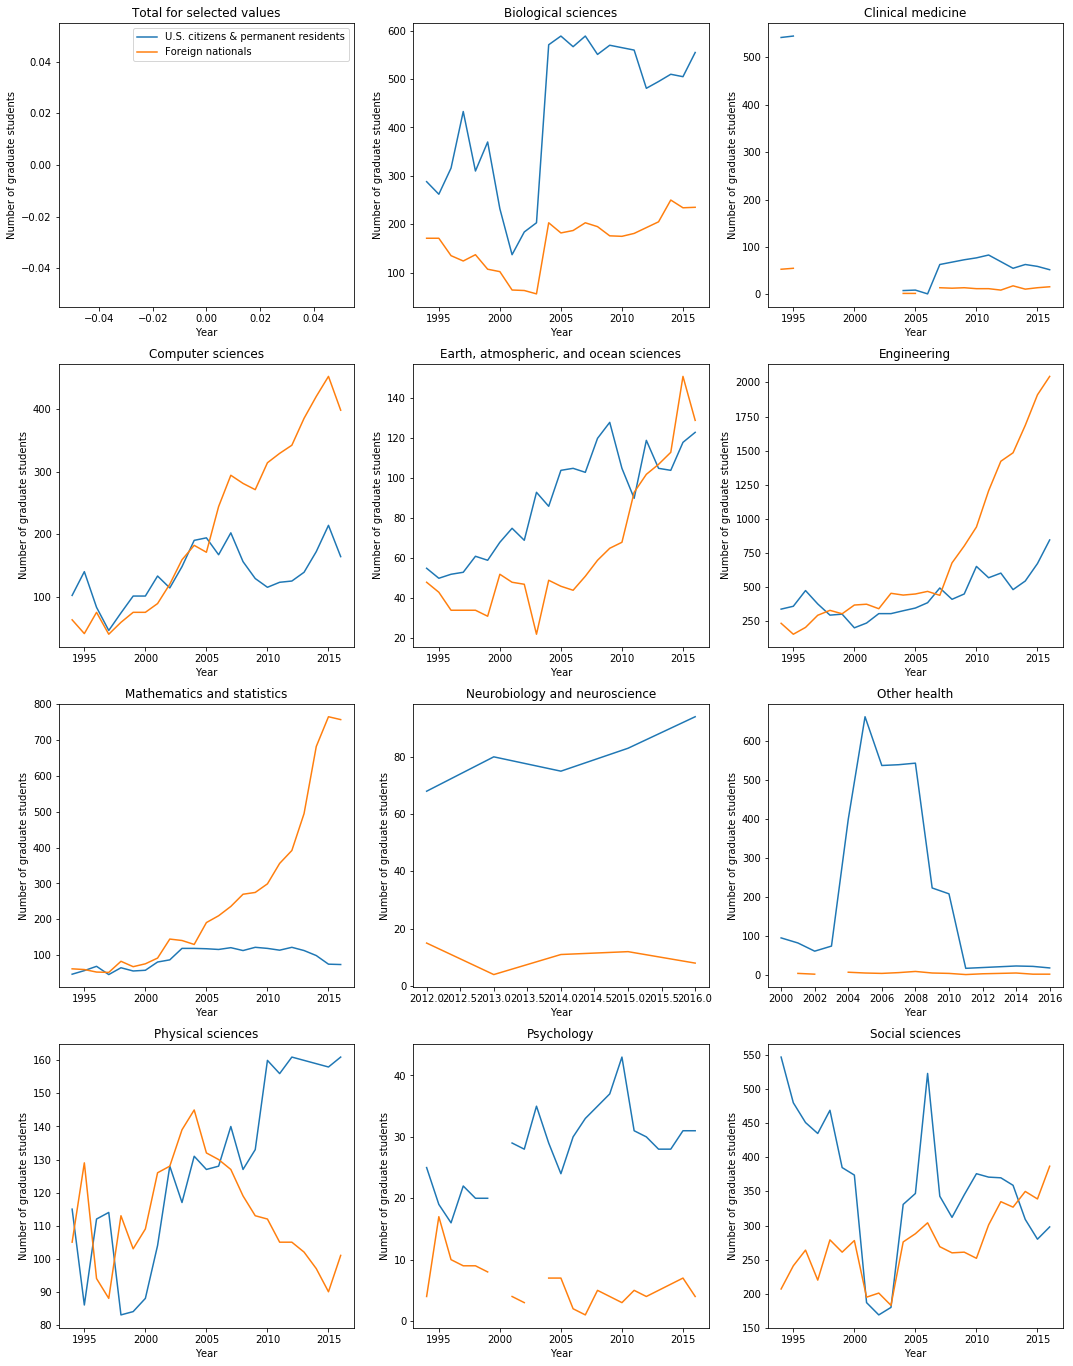

In [5]:
cols = 3
rows = int(len(ufields) / cols)
_, axarr = plt.subplots(rows, cols, figsize=(18, 24))

for i in range(len(ufields)):
    plotField(axarr[ i // cols, i % cols ], ufields[i])
    
axarr[0, 0].legend()

Let's isolate those STEM fields that see the greatest international student increases.

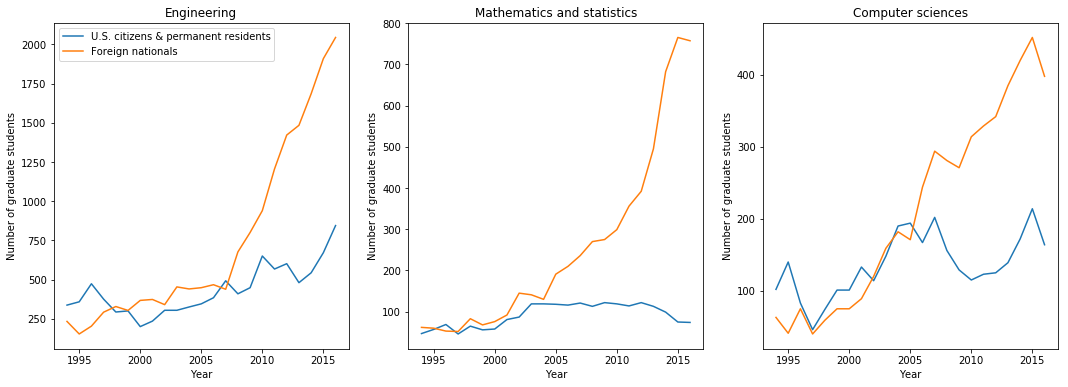

In [21]:
fieldsOfInterest = [
    'Engineering',
    'Mathematics and statistics',
    'Computer sciences',
]

_, axarr = plt.subplots(1, 3, figsize=(18, 6))

for i in range(len(fieldsOfInterest)):
    plotField(axarr[i], fieldsOfInterest[i])
axarr[0].legend()

In [20]:
fieldCounts = {}
for f in ufields:
    counts = [d[year][f].get(INT_COL_NAME, None) for year in years]
    if None not in counts:
        fieldCounts[f] = counts

## Findings

In the last decade, in engineering, mathematics and statistics, and the computer sciences, international student populations have overtaken domestic student populations.

At Columbia, those fields are largely made up of international students.